## Data exploration and scratch notebook

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
file = open('data/HAPT_data_set/features.txt', 'r')
lines = file.readlines()

columns = [line.replace('\n', '').strip() for line in lines]
file.close()

In [3]:
len(columns)

561

In [4]:
unique_cols = []

for idx, val in enumerate(columns):
    if val not in unique_cols:
        unique_cols.append(val)
    else:
        unique_cols.append(val+'__'+str(idx))
        
unique_cols

['tBodyAcc-Mean-1',
 'tBodyAcc-Mean-2',
 'tBodyAcc-Mean-3',
 'tBodyAcc-STD-1',
 'tBodyAcc-STD-2',
 'tBodyAcc-STD-3',
 'tBodyAcc-Mad-1',
 'tBodyAcc-Mad-2',
 'tBodyAcc-Mad-3',
 'tBodyAcc-Max-1',
 'tBodyAcc-Max-2',
 'tBodyAcc-Max-3',
 'tBodyAcc-Min-1',
 'tBodyAcc-Min-2',
 'tBodyAcc-Min-3',
 'tBodyAcc-SMA-1',
 'tBodyAcc-Energy-1',
 'tBodyAcc-Energy-2',
 'tBodyAcc-Energy-3',
 'tBodyAcc-IQR-1',
 'tBodyAcc-IQR-2',
 'tBodyAcc-IQR-3',
 'tBodyAcc-ropy-1',
 'tBodyAcc-ropy-1__23',
 'tBodyAcc-ropy-1__24',
 'tBodyAcc-ARCoeff-1',
 'tBodyAcc-ARCoeff-2',
 'tBodyAcc-ARCoeff-3',
 'tBodyAcc-ARCoeff-4',
 'tBodyAcc-ARCoeff-5',
 'tBodyAcc-ARCoeff-6',
 'tBodyAcc-ARCoeff-7',
 'tBodyAcc-ARCoeff-8',
 'tBodyAcc-ARCoeff-9',
 'tBodyAcc-ARCoeff-10',
 'tBodyAcc-ARCoeff-11',
 'tBodyAcc-ARCoeff-12',
 'tBodyAcc-Correlation-1',
 'tBodyAcc-Correlation-2',
 'tBodyAcc-Correlation-3',
 'tGravityAcc-Mean-1',
 'tGravityAcc-Mean-2',
 'tGravityAcc-Mean-3',
 'tGravityAcc-STD-1',
 'tGravityAcc-STD-2',
 'tGravityAcc-STD-3',
 'tGrav

In [5]:
X_train = pd.read_csv('data/HAPT_data_set/Train/X_train.txt', delimiter=' ', engine='python', header=None, names=unique_cols)

In [6]:
X_train.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080


In [7]:
# save first 100 rows to submit
# df.head(100).to_csv('sample_data.csv', index=False)

In [8]:
y_train = pd.read_csv('data/HAPT_data_set/Train/y_train.txt', header=None, names=['Activity_Label'])
y_train.head()

,Activity_Label
0,5
1,5
2,5
3,5
4,5


In [9]:
len(X_train) == len(y_train)

True

In [10]:
X_test = pd.read_csv('data/HAPT_data_set/Test/X_test.txt', delimiter=' ', engine='python', header=None, names=unique_cols)
y_test = pd.read_csv('data/HAPT_data_set/Test/y_test.txt', header=None, names=['Activity_Label'])

len(X_test) == len(y_test)

True

In [11]:
len(X_test)

3162

In [12]:
X_test.head()

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.030914,-0.008927,0.040382,-0.938504,-0.944626,-0.759334,-0.952398,-0.950281,-0.802483,-0.757099,...,0.122830,-0.345684,-0.709087,0.006462,0.162920,-0.825886,0.271151,-0.720559,0.276779,-0.051074
1,0.042548,0.001079,-0.026236,-0.975516,-0.977502,-0.960146,-0.986694,-0.978983,-0.966820,-0.757099,...,-0.314688,-0.142804,-0.600867,-0.083495,0.017500,-0.434375,0.920593,-0.698684,0.281322,-0.076825
2,0.038297,-0.011660,-0.025643,-0.993922,-0.979215,-0.973030,-0.994298,-0.980535,-0.977508,-0.799005,...,0.114730,-0.209525,-0.645500,-0.034956,0.202302,0.064103,0.145068,-0.703355,0.280062,-0.072302
3,0.036205,-0.018148,-0.025240,-0.994845,-0.981534,-0.976175,-0.995169,-0.983020,-0.980785,-0.798401,...,0.164515,-0.359352,-0.738474,-0.017067,0.154438,0.340134,0.296407,-0.699545,0.284093,-0.070079
4,0.038034,-0.013437,-0.032899,-0.993955,-0.977493,-0.984290,-0.994006,-0.977354,-0.985899,-0.798401,...,-0.056085,-0.544467,-0.846150,-0.002223,-0.040046,0.736715,-0.118545,-0.692849,0.290701,-0.066849


### Turn Train and Test features and labels into a single DF

In [13]:
# Join the labels and the features.
train = y_train.join(X_train)
test = y_test.join(X_test)

# Remove transition activites
train = train[train['Activity_Label'] < 7]
test = test[test['Activity_Label'] < 7]

# Add binary activity column for first stage classification
train['binary_activity'] = np.where(train['Activity_Label'] < 4, 'D', 'S')
test['binary_activity'] = np.where(test['Activity_Label'] < 4, 'D', 'S')

# Check the lengths and that the train test split ratio was retained after removing transition activities.
print(f'''Training set instances: {len(train)}
Testing set instances: {len(test)}
Train/Test Ratio: {int(len(train)/(len(train)+len(test))*100)}/{int(len(test)/(len(train)+len(test))*100)}''')

Training set instances: 7415
Testing set instances: 2996
Train/Test Ratio: 71/28


/Users/jonnyhofmeister/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


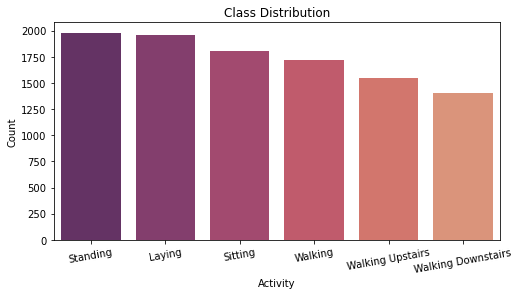

In [55]:
train_counts = train['Activity_Label'].value_counts().values
test_counts = test['Activity_Label'].value_counts().values
counts = train_counts + test_counts
labels = ['Standing', 'Laying', 'Sitting', 'Walking', 'Walking Upstairs', 'Walking Downstairs']

fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(labels, counts, palette='flare_r')
ax.tick_params(axis='x', labelrotation=10)
ax.set_title("Class Distribution")
ax.set_xlabel('Activity')
ax.set_ylabel('Count')
# plt.tight_layout()
fig.savefig('images/class_distribution.png')

In [59]:
train.head(20)

,Activity_Label,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,binary_activity
0,5,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,S
1,5,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,S
2,5,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,S
3,5,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,S
4,5,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,S
5,5,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,...,-0.554902,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,S
6,5,0.039897,-0.005324,-0.020457,-0.997024,-0.977313,-0.987782,-0.996898,-0.977450,-0.989391,...,-0.235576,-0.571126,-0.212754,-0.230622,0.014637,-0.189512,-0.852441,0.182142,-0.036203,S
7,5,0.039082,-0.016047,-0.030241,-0.996662,-0.976996,-0.986672,-0.996380,-0.977594,-0.989310,...,-0.104337,-0.432022,-0.020888,0.593996,-0.561871,0.467383,-0.851309,0.183751,-0.035176,S
8,5,0.039026,-0.007410,-0.027301,-0.997431,-0.973190,-0.988183,-0.997491,-0.971557,-0.990156,...,-0.286366,-0.579474,0.012954,0.080936,-0.234313,0.117797,-0.848270,0.188955,-0.030594,S
9,5,0.040354,0.004245,-0.017932,-0.994906,-0.981181,-0.990046,-0.995300,-0.982483,-0.990920,...,0.306076,0.115919,-0.020590,-0.127730,-0.482871,-0.070670,-0.848592,0.190283,-0.027667,S


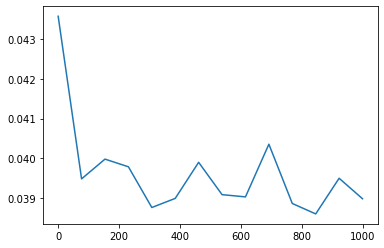

In [63]:
timesteps = np.linspace(0,1000, 14)
t1 = train['tBodyAcc-Mean-1'][:14]
plt.plot(timesteps, t1)

# **Making plot from raw data**